<a href="https://colab.research.google.com/github/VuMaiTuan/20144483-VuMaiTuan/blob/main/BUOI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import numpy as np
import skfuzzy as fuzz
x= np.arange(11)
mfx=fuzz.trimf(x,[0,5,10])
x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

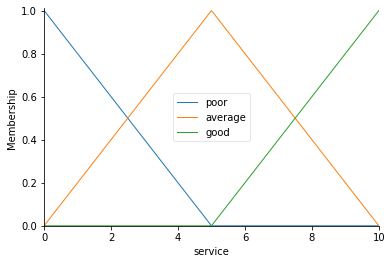

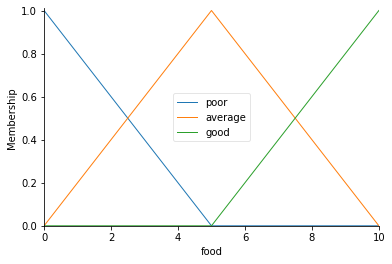

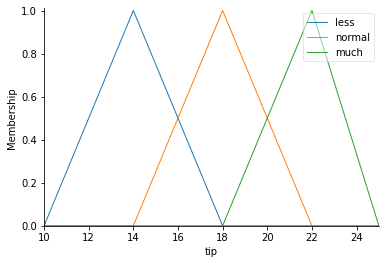

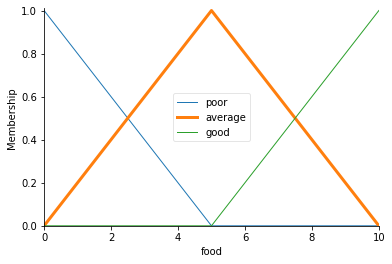

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,26,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,14,18])
tip['normal'] = fuzz.trimf(tip.universe,[14,18,22])
tip['much'] = fuzz.trimf(tip.universe,[18,22,25])

rule1= ctrl.Rule(food['poor'], service['poor'],tip['less'])
rule2= ctrl.Rule(food['average'], service['poor'],tip['less'])
rule3= ctrl.Rule(food['good'], service['poor'],tip['normal'])
rule4= ctrl.Rule(food['poor'], service['average'],tip['less'])
rule5= ctrl.Rule(food['poor'], service['good'],tip['normal'])
rule6= ctrl.Rule(food['average'], service['average'],tip['normal'])
rule7= ctrl.Rule(food['good'], service['average'],tip['much'])
rule8= ctrl.Rule(food['average'], service['good'],tip['much'])

service.view()
food.view()
tip.view()
food['average'].view()

19.617117117117115


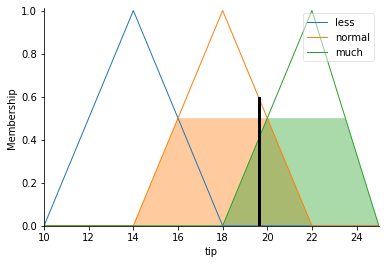

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,26,1),'tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,14,18])
tip['normal']=fuzz.trimf(tip.universe,[14,18,22])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])

rule1= ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2= ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3= ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule4= ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5= ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6= ctrl.Rule(food['average']&service['good'],tip['much'])
rule7= ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule8= ctrl.Rule(food['good']&service['average'],tip['much'])
rule9= ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_rule=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_rule)

tipping.input['food']=6.2
tipping.input['service']=7.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

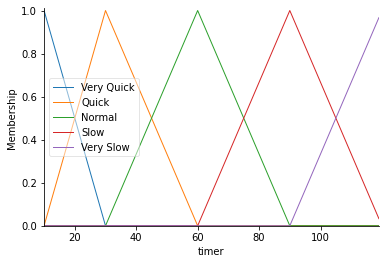

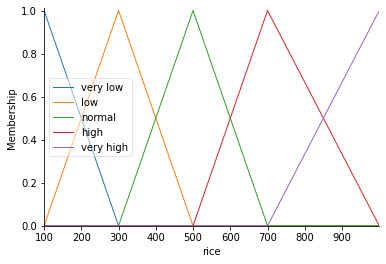

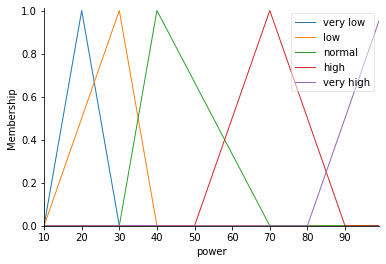

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
timer=ctrl.Antecedent(np.arange(10,120,1),'timer')    
rice=ctrl.Antecedent(np.arange(100,1000,1),'rice')
power=ctrl.Consequent(np.arange(10,100,1),'power')

timer['Very Quick']=fuzz.trimf(timer.universe,[10,10,30])
timer['Quick']=fuzz.trimf(timer.universe,[10,30,60])
timer['Normal']=fuzz.trimf(timer.universe,[30,60,90])
timer['Slow']=fuzz.trimf(timer.universe,[60,90,120])
timer['Very Slow']=fuzz.trimf(timer.universe,[90,120,120])

rice['very low']=fuzz.trimf(rice.universe,[100,100,300])
rice['low']=fuzz.trimf(rice.universe,[100,300,500])
rice['normal']=fuzz.trimf(rice.universe,[300,500,700])
rice['high']=fuzz.trimf(rice.universe,[500,700,1000])
rice['very high']=fuzz.trimf(rice.universe,[700,1000,1000])

power['very low']=fuzz.trimf(power.universe,[10,20,30])
power['low']=fuzz.trimf(power.universe,[10,30,40])
power['normal']=fuzz.trimf(power.universe,[30,40,70])
power['high']=fuzz.trimf(power.universe,[50,70,90])
power['very high']=fuzz.trimf(power.universe,[80,100,100])

timer.view()
rice.view()
power.view()